## Continuación de la Sección 5

En esta sección, cargamos el modelo final de la sección anterior y lo usamos para hacer predicciones en el conjunto de datos de competición.

In [4]:
import pandas as pd
import numpy as np
import joblib 

final_model = joblib.load("modelo_final.pkl")

# Cargamos el dataset
wind_comp = pd.read_csv('wind_comp.csv.gz', compression="gzip")

all_columns = wind_comp.columns.tolist()

# Identificamos las columnas importantes
sotavento_columns = [col for col in all_columns if '.13' in col]

# Creamos subset del dataset para contener sólo esas columnas
wind_comp_sotavento = wind_comp[sotavento_columns]

# Generamos predicciones con nuestro modelo
predictions = final_model.predict(wind_comp_sotavento)

# Guardamos las predicciones en un CSV
pd.DataFrame(predictions, columns=["PredictedEnergyOutput"]).to_csv("predicciones.csv", index=False)


Con eso, tenemos nuestras predicciones. También podemos ver la distribución de los datos.

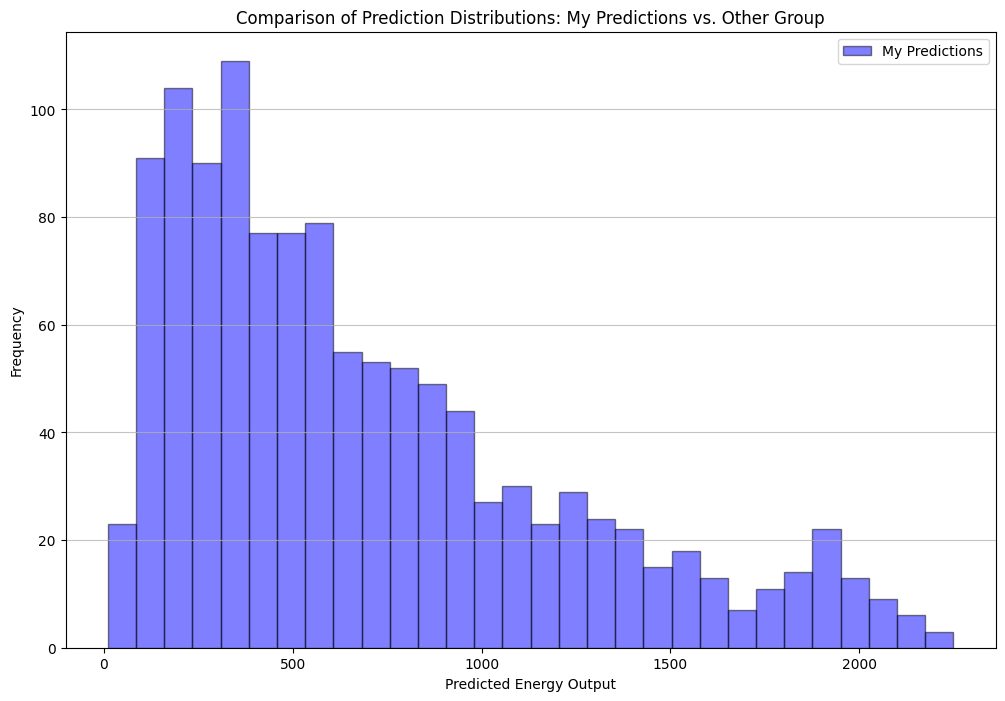

In [5]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))


plt.hist(predictions, bins=30, alpha=0.5, label='My Predictions', color='blue', edgecolor='black')



plt.title('Comparison of Prediction Distributions: My Predictions vs. Other Group')
plt.xlabel('Predicted Energy Output')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

Vemos que está torcido como nuestro dataset original.